# Demo Structure

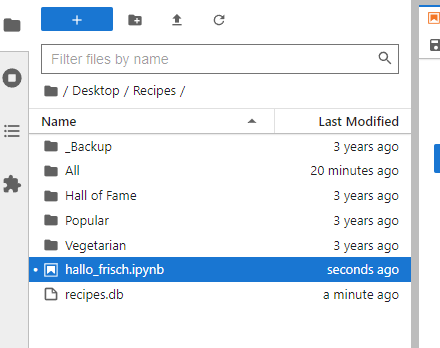

# Loading Data Stored as Individual .json Files into Python

In [1]:
import os

list_of_folders = []

# Get a list of folders
for root, dirs, files in os.walk("."):
    for dir in dirs:
        list_of_folders.append(root + "\\" + dir)

In [2]:
folders_to_ignore = [
    ".\\.ipynb_checkpoints",
    ".\\All",
    ".\\_Backup",
    ".\\Hall of Fame",
    ".\\Vegetarian",
    ".\\Popular",
    ".\\.idea",
]

for folder in list_of_folders[:]:
    if (
        folder in folders_to_ignore
        or folder[:9] == ".\\_Backup"
        or folder[:7] == ".\\.idea"
    ):
        list_of_folders.remove(folder)

In [3]:
list_of_folders[0] + "\\" + "deets.json"

'.\\All\\20-oz-rib-eye-steaks-in-a-shallot-demi-glace-sauce-with-mashed-potatoes-and-honey-roasted-carrots\\deets.json'

In [4]:
import json

with open(list_of_folders[0] + "\\" + "deets.json") as f:
    recipe = json.load(f)

# Show the Data to be Written to the Table

In [5]:
print(f"Title: {recipe['Title']}")
print(f"Url: {recipe['Recipe URL']}")
print(f"Image: {recipe['Image URL']}")
print(f"Yields {recipe['Yields']}")
print(f"Host {recipe['Host']}")
print(f"Time Total: {recipe['Time Total']}\n")

print("Ingredients:")
for ingredient in recipe["Ingredients"]:
    print(f"\t{ingredient}")

print(f"\nDirections:\n\n{recipe['Directions']}\n")

print("Nutrition:")
for key, value in recipe["Nutrition"].items():
    print(f"\t{key}: {value}")

Title: 20 oz Rib-Eye Steaks in a Shallot Demi-Glace Sauce with Mashed Potatoes and Honey-Roasted Carrots
Url: https://www.hellofresh.com/recipes/20-oz-rib-eye-steaks-in-a-shallot-demi-glace-sauce-5bb4d87830006c612d4a8c02
Image: https://img.hellofresh.com/f_auto,fl_lossy,h_2500,q_auto,w_4800/hellofresh_s3/image/20-oz-rib-eye-steaks-in-a-shallot-demi-glace-sauce-59282e84.jpg
Yields 2 serving(s)
Host hellofresh.com
Time Total: 40

Ingredients:
	['1.0', 'Shallot']
	['1.0 teaspoon', 'Herbes de Provence']
	['4.0', 'Carrots']
	['1.0', 'Beef Demi-Glace']
	['2.0', 'Scallions']
	['20.0 ounce', 'Ribeye']
	['1.0 teaspoon', 'Chili Flakes']
	['1.0 tablespoon', 'Olive Oil']
	['3.0 tablespoon', 'Butter']
	['0.5 ounce', 'Honey']
	['6.0 tablespoon', 'Sour Cream']
	['12.0 ounce', 'Yukon Gold Potatoes']
	['2.0 teaspoon', 'Vegetable Oil']

Directions:

Wash and dry all produce. Adjust rack to upper position and preheat oven to 425 degrees. Peel carrots, then cut on an angle into Â½-inch-thick pieces. In a 

# Creating Tables

Create a table to hold the recipes, and since there is a one to many relationship between the ingredients and the nutritional information, create two more tables with foreign keys for those pointing back to the Recipe ID.

```python
print(f"Title: {recipe['Title']}")
print(f"Url: {recipe['Recipe URL']}")
print(f"Image: {recipe['Image URL']}")
print(f"Yields {recipe['Yields']}")
print(f"Host {recipe['Host']}")
print(f"Time Total: {recipe['Time Total']}\n")

print("Ingredients:")
for ingredient in recipe['Ingredients']:
    print(f"\t{ingredient}")

print(f"\nDirections:\n\n{recipe['Directions']}\n")

print("Nutrition:")
for key, value in recipe['Nutrition'].items():
    print(f"\t{key}: {value}")
```

In [6]:
import sqlite3

with sqlite3.connect(r"recipes.db") as conn:
    sql_query = """SELECT name FROM sqlite_master WHERE type='table';"""

    cursor = conn.cursor()

    cursor.execute(sql_query)
    print(cursor.fetchall())

[('Ingredients',), ('Nutrition',), ('Recipe',)]


In [7]:
# Creating table
Recipe = """ 
create table Recipe
    (
        ID         INTEGER not null
            primary key,
        Title      TEXT,
        URL        TEXT,
        Image      TEXT,
        Yields     TEXT,
        Host       TEXT,
        Time       INTEGER,
        Directions TEXT
    ); 
"""

# Check if recipe table exists, create it if not
cursor.execute("SELECT name FROM sqlite_master WHERE type='table' AND name='Recipe'")

if cursor.fetchall():
    print("Table already exists")
else:
    cursor.execute(Recipe)
    print("Created Recipe Table")

Table already exists


**Creating the other two tables**

In [8]:
# Creating table 2
Ingredients = """ 

create table Ingredients
    (
      ID         integer not null
          constraint ID
              primary key,
      Quantity   FLOAT,
      Ingredient CHARACTER,
      Recipe_ID  integer not null
          constraint ID
              references Recipe
    );

"""


# Check if recipe table exists, create it if not
cursor.execute(
    "SELECT name FROM sqlite_master WHERE type='table' AND name='Ingredients'"
)

if cursor.fetchall():
    print("Table already exists")
else:
    cursor.execute(ingredients)
    print("Created Ingredients Table")

Table already exists


In [9]:
# Creating table 3
nutrition = """ 
create table Nutrition
    (
        ID                  integer not null
            constraint Nutrition_pk
                primary key,
        RecipeID            integer not null
            constraint RecipeID
                references Recipe,
        calories            TEXT,
        FatContent          TEXT,
        SaturatedFatContent TEXT,
        CarboHydrateContent TEXT,
        SugarContent        TEXT,
        ProteinContent      TEXT,
        FiberContent        TEXT,
        CholesterolContent  TEXT,
        SodiumContent       TEXT
    );
"""


# Check if recipe table exists, create it if not
cursor.execute("SELECT name FROM sqlite_master WHERE type='table' AND name='Nutrition'")

if cursor.fetchall():
    print("Table already exists")
else:
    cursor.execute(nutrition)
    print("Created Nutrition Table")

Table already exists


# Reading the Newly Created Table from SQLite

In [10]:
cursor.execute(sql_query)
print(cursor.fetchall())

[('Ingredients',), ('Nutrition',), ('Recipe',)]


In [11]:
import pandas as pd

recipe_df = pd.read_sql_query("SELECT * FROM Recipe", conn)
recipe_df

,ID,Title,URL,Image,Yields,Host,Time,Directions


In [12]:
ingredients_df = pd.read_sql_query("SELECT * FROM Ingredients", conn)
ingredients_df

,ID,Quantity,Ingredient,Recipe_ID


In [13]:
nutrition_df = pd.read_sql_query("SELECT * FROM Nutrition", conn)
nutrition_df

,ID,RecipeID,calories,FatContent,SaturatedFatContent,CarboHydrateContent,SugarContent,ProteinContent,FiberContent,CholesterolContent,SodiumContent


# Add values to a Pandas DataFrame from the JSON File

In [14]:
recipe.keys()

dict_keys(['Title', 'Recipe URL', 'Image URL', 'Yields', 'Host', 'Time Total', 'Ingredients', 'Directions', 'Nutrition'])

In [15]:
recipe_df.append(recipe, ignore_index=True)

C:\Users\drpar\AppData\Local\Temp\ipykernel_205636\4232480434.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  recipe_df.append(recipe, ignore_index=True)


,ID,Title,URL,Image,Yields,Host,Time,Directions,Recipe URL,Image URL,Time Total,Ingredients,Nutrition
0,NaN,20 oz Rib-Eye Steaks in a Shallot Demi-Glace S...,NaN,NaN,2 serving(s),hellofresh.com,NaN,Wash and dry all produce. Adjust rack to upper...,https://www.hellofresh.com/recipes/20-oz-rib-e...,"https://img.hellofresh.com/f_auto,fl_lossy,h_2...",40,"[[1.0, Shallot], [1.0 teaspoon, Herbes de Prov...","{'calories': '1230 kcal', 'fatContent': '81 g'..."


In [16]:
# Define the translations to go from json file keys to database/dataframe columns
recipe_input_rows = {
    "ID": "",
    "Title": "Title",
    "URL": "Recipe URL",
    "Image": "Image URL",
    "Yields": "Yields",
    "Host": "Host",
    "Time": "Time Total",
    "Directions": "Directions",
}

In [17]:
rows_list = []
recipe_id = 0
dict1 = {}

for key in recipe_input_rows.keys():
    if key == "ID":
        dict1[key] = recipe_id
    else:
        dict1[key] = recipe[recipe_input_rows[key]]

rows_list.append(dict1)

df = pd.DataFrame(rows_list)
df

,ID,Title,URL,Image,Yields,Host,Time,Directions
0,0,20 oz Rib-Eye Steaks in a Shallot Demi-Glace S...,https://www.hellofresh.com/recipes/20-oz-rib-e...,"https://img.hellofresh.com/f_auto,fl_lossy,h_2...",2 serving(s),hellofresh.com,40,Wash and dry all produce. Adjust rack to upper...


# Write the Dataframe to the SQLite DB

In [18]:
import sys

try:
    df.to_sql("Recipe", con=conn, if_exists="append", index=False)
except sqlite3.IntegrityError as e:
    print("Entry already exists in Table", e)

In [19]:
recipe_df = pd.read_sql_query("SELECT * FROM Recipe", conn)
recipe_df

,ID,Title,URL,Image,Yields,Host,Time,Directions
0,0,20 oz Rib-Eye Steaks in a Shallot Demi-Glace S...,https://www.hellofresh.com/recipes/20-oz-rib-e...,"https://img.hellofresh.com/f_auto,fl_lossy,h_2...",2 serving(s),hellofresh.com,40,Wash and dry all produce. Adjust rack to upper...


# Tie it all Together

In [20]:
i = 1
rows_list = []
dict1 = {}

# Loop through all the folders containing the recipe json files
for folder in list_of_folders[1:]:
    json_file = folder + "\\" + "deets.json"

    with open(json_file, encoding="utf-8") as f:
        recipe = json.load(f)

    for key in recipe_input_rows.keys():
        if key == "ID":
            dict1[key] = i
        else:
            dict1[key] = recipe[recipe_input_rows[key]]

    rows_list.append(dict1.copy())

    i += 1

df = pd.DataFrame(rows_list)

try:
    df.to_sql("Recipe", con=conn, if_exists="append", index=False)
    print(f"Wrote {len(df)} records to `recipes.db`")
except sqlite3.IntegrityError as e:
    print("Entry already exists in Table", e)

Wrote 469 records to `recipes.db`
